<a href="https://colab.research.google.com/github/pvihung/Deep_Learning/blob/main/ML_healthy_eating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    Normalizer,
    OneHotEncoder,
    LabelEncoder,
    OrdinalEncoder,
    Binarizer,
    PolynomialFeatures,
)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    mean_squared_error,
    r2_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import make_column_transformer
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras import callbacks
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
file_path2 = '/content/healthy_eating_dataset.csv'
health_eating = pd.read_csv(file_path2)
health_eating

,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url
0,1,Kid Pasta,Indian,Lunch,Keto,737,52.4,43.9,34.3,16.8,42.9,2079,91,206,Grilled,47,56,4.4,0,https://example.com/images/meal_1.jpg
1,2,Husband Rice,Mexican,Lunch,Paleo,182,74.7,144.4,0.1,22.3,38.6,423,7,317,Roasted,51,34,2.4,0,https://example.com/images/meal_2.jpg
2,3,Activity Rice,Indian,Snack,Paleo,881,52.9,97.3,18.8,20.0,37.5,2383,209,395,Boiled,58,29,4.3,0,https://example.com/images/meal_3.jpg
3,4,Another Salad,Mexican,Snack,Keto,427,17.5,73.1,7.6,9.8,41.7,846,107,499,Grilled,14,81,4.6,0,https://example.com/images/meal_4.jpg
4,5,Quite Stew,Thai,Lunch,Vegan,210,51.6,104.3,26.3,24.8,18.2,1460,42,486,Raw,47,105,4.3,0,https://example.com/images/meal_5.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Admit Curry,Mediterranean,Lunch,Keto,163,16.0,48.1,3.6,26.6,40.9,984,155,447,Grilled,37,71,1.3,0,https://example.com/images/meal_1996.jpg
1996,1997,Majority Sandwich,Mediterranean,Snack,Balanced,177,79.5,24.4,12.9,27.1,13.6,1612,271,211,Roasted,60,9,1.5,1,https://example.com/images/meal_1997.jpg
1997,1998,Speech Sandwich,Indian,Lunch,Balanced,419,31.8,42.9,42.7,9.4,29.1,1192,201,248,Roasted,50,95,3.8,0,https://example.com/images/meal_1998.jpg
1998,1999,Away Rice,American,Dinner,Keto,1123,6.9,119.6,23.1,0.8,17.7,360,146,342,Fried,15,20,4.2,0,https://example.com/images/meal_1999.jpg


In [ ]:
df = health_eating.copy()

# WRAGLING and OVERVIEWING Data

## Overview

array([[<Axes: title={'center': 'meal_id'}>,
        <Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'protein_g'}>,
        <Axes: title={'center': 'carbs_g'}>],
       [<Axes: title={'center': 'fat_g'}>,
        <Axes: title={'center': 'fiber_g'}>,
        <Axes: title={'center': 'sugar_g'}>,
        <Axes: title={'center': 'sodium_mg'}>],
       [<Axes: title={'center': 'cholesterol_mg'}>,
        <Axes: title={'center': 'serving_size_g'}>,
        <Axes: title={'center': 'prep_time_min'}>,
        <Axes: title={'center': 'cook_time_min'}>],
       [<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'is_healthy'}>, <Axes: >, <Axes: >]],
      dtype=object)

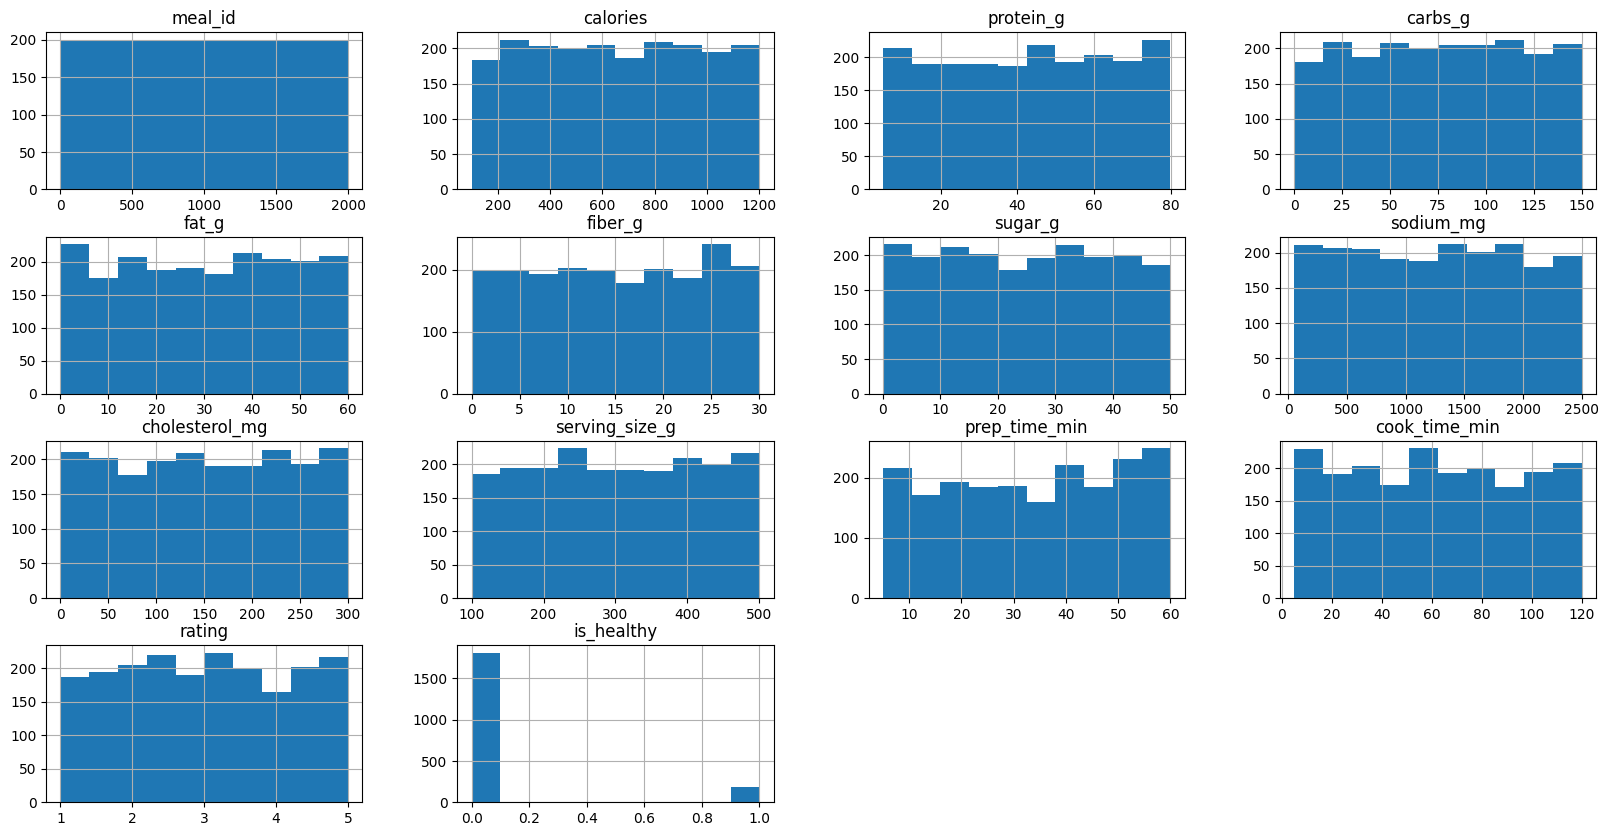

In [ ]:
df.hist(figsize=(20,10))

In [ ]:
health_eating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   meal_id         2000 non-null   int64  
 1   meal_name       2000 non-null   object 
 2   cuisine         2000 non-null   object 
 3   meal_type       2000 non-null   object 
 4   diet_type       2000 non-null   object 
 5   calories        2000 non-null   int64  
 6   protein_g       2000 non-null   float64
 7   carbs_g         2000 non-null   float64
 8   fat_g           2000 non-null   float64
 9   fiber_g         2000 non-null   float64
 10  sugar_g         2000 non-null   float64
 11  sodium_mg       2000 non-null   int64  
 12  cholesterol_mg  2000 non-null   int64  
 13  serving_size_g  2000 non-null   int64  
 14  cooking_method  2000 non-null   object 
 15  prep_time_min   2000 non-null   int64  
 16  cook_time_min   2000 non-null   int64  
 17  rating          2000 non-null   f

**Finding**: Similar to previous dataset, ***health_eating*** dataset does not have missing value. There are ***6*** non_numerical variables including: meal_name, cuisine, meal_type, diet_type, cooking_method, and image_url.

In [ ]:
df['is_healthy'].value_counts()

,count
is_healthy,
0,1813
1,187


***Finding***: One think to keep in mind is how the label is shifted to 0 (unhealthy food)

## Normalize Data

### Checking meal_name, cuisine, meal_type, diet_type, cooking_method, and image_url.

In [ ]:
# We might not want to check image_url

print('Meal name:', df['meal_name'].unique())
print('Cuisine:', df['cuisine'].unique())
print('Meal Type:', df['meal_type'].unique())
print('Diet Type:', df['diet_type'].unique())
print('Method:', df['cooking_method'].unique())

Meal name: ['Kid Pasta' 'Husband Rice' 'Activity Rice' ... 'Speech Sandwich'
 'Away Rice' 'List Pasta']
Cuisine: ['Indian' 'Mexican' 'Thai' 'Italian' 'American' 'Chinese' 'Mediterranean'
 'Japanese']
Meal Type: ['Lunch' 'Snack' 'Dinner' 'Breakfast']
Diet Type: ['Keto' 'Paleo' 'Vegan' 'Balanced' 'Vegetarian' 'Low-Carb']
Method: ['Grilled' 'Roasted' 'Boiled' 'Raw' 'Steamed' 'Baked' 'Fried']


***Finding***: cuisine, meal_type, diet_type, cooking_method are correctly formatting, but one thing we can easily notice is the meal_name has many different values, but all of them are in the format: `adj + meal_name`. Our solution to this might be to strip the data and get only the latter part, which is the name

In [ ]:
df['meal'] = df['meal_name'].str.split(' ').str[1]
df

,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,...,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url,meal
0,1,Kid Pasta,Indian,Lunch,Keto,737,52.4,43.9,34.3,16.8,...,2079,91,206,Grilled,47,56,4.4,0,https://example.com/images/meal_1.jpg,Pasta
1,2,Husband Rice,Mexican,Lunch,Paleo,182,74.7,144.4,0.1,22.3,...,423,7,317,Roasted,51,34,2.4,0,https://example.com/images/meal_2.jpg,Rice
2,3,Activity Rice,Indian,Snack,Paleo,881,52.9,97.3,18.8,20.0,...,2383,209,395,Boiled,58,29,4.3,0,https://example.com/images/meal_3.jpg,Rice
3,4,Another Salad,Mexican,Snack,Keto,427,17.5,73.1,7.6,9.8,...,846,107,499,Grilled,14,81,4.6,0,https://example.com/images/meal_4.jpg,Salad
4,5,Quite Stew,Thai,Lunch,Vegan,210,51.6,104.3,26.3,24.8,...,1460,42,486,Raw,47,105,4.3,0,https://example.com/images/meal_5.jpg,Stew
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Admit Curry,Mediterranean,Lunch,Keto,163,16.0,48.1,3.6,26.6,...,984,155,447,Grilled,37,71,1.3,0,https://example.com/images/meal_1996.jpg,Curry
1996,1997,Majority Sandwich,Mediterranean,Snack,Balanced,177,79.5,24.4,12.9,27.1,...,1612,271,211,Roasted,60,9,1.5,1,https://example.com/images/meal_1997.jpg,Sandwich
1997,1998,Speech Sandwich,Indian,Lunch,Balanced,419,31.8,42.9,42.7,9.4,...,1192,201,248,Roasted,50,95,3.8,0,https://example.com/images/meal_1998.jpg,Sandwich
1998,1999,Away Rice,American,Dinner,Keto,1123,6.9,119.6,23.1,0.8,...,360,146,342,Fried,15,20,4.2,0,https://example.com/images/meal_1999.jpg,Rice


## Removing Duplicate

In [ ]:
df.drop_duplicates(inplace=True)

## Checking and Removing Outliers

In [ ]:
df.describe()

,meal_id,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,prep_time_min,cook_time_min,rating,is_healthy
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,650.061500,42.863750,75.924250,30.065300,15.245800,24.60230,1257.316000,150.459500,302.620000,33.354500,61.507000,2.984250,0.093500
std,577.494589,315.419877,21.992887,42.749671,17.573243,8.754933,14.48074,709.587762,87.940048,115.489643,16.476941,33.559411,1.164884,0.291205
min,1.000000,100.000000,5.000000,0.000000,0.000000,0.000000,0.00000,50.000000,0.000000,100.000000,5.000000,5.000000,1.000000,0.000000
25%,500.750000,372.000000,23.600000,39.200000,14.800000,7.600000,12.00000,647.500000,72.000000,207.000000,19.000000,33.000000,2.000000,0.000000
50%,1000.500000,648.000000,43.600000,75.950000,30.300000,15.150000,24.75000,1273.000000,150.000000,302.000000,34.000000,61.000000,3.000000,0.000000
75%,1500.250000,914.500000,61.900000,113.025000,45.200000,23.200000,37.20000,1854.500000,228.000000,402.000000,48.000000,90.000000,4.000000,0.000000
max,2000.000000,1200.000000,79.900000,150.000000,60.000000,30.000000,50.00000,2499.000000,300.000000,500.000000,60.000000,120.000000,5.000000,1.000000


***Finding***: There are some row with value = 0. It is very weird since our data do not have null variable. Columns might want to check:
- carbs_g
- fat_g (most likely)
- fiber_g
- sugar_g
- sodium_mg
- cholesterol_mg

In [ ]:
def checking_min_row(data, col):
  return data[(data[col] == data[col].min()) | (data[col] == 0)]

print('0 carbs meal')
display(checking_min_row(df,'carbs_g'))

print('\n 0 fat meal')
display(checking_min_row(df, 'fat_g'))

print('\n 0 fiber meal')
display(checking_min_row(df, 'fiber_g'))

print('\n 0 sugar meal')
display(checking_min_row(df, 'sugar_g'))

print('\n 50 sodium meal')
display(checking_min_row(df, 'sodium_mg'))

print('\n 0 cholesterol meal')
display(checking_min_row(df, 'cholesterol_mg'))

0 carbs meal


,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,...,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url,meal
64,65,Thought Rice,American,Dinner,Vegetarian,477,51.5,0.0,11.1,13.4,...,533,198,297,Boiled,55,42,4.1,0,https://example.com/images/meal_65.jpg,Rice



 0 fat meal


,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,...,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url,meal
124,125,Particular Wrap,Japanese,Lunch,Paleo,870,59.8,102.9,0.0,5.2,...,1608,196,124,Grilled,22,36,1.0,0,https://example.com/images/meal_125.jpg,Wrap



 0 fiber meal


,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,...,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url,meal
953,954,Ball Curry,American,Snack,Low-Carb,907,30.0,147.3,56.8,0.0,...,1322,140,217,Fried,34,50,4.1,0,https://example.com/images/meal_954.jpg,Curry
1765,1766,Learn Soup,Mexican,Dinner,Balanced,1064,51.6,88.1,36.1,0.0,...,2202,158,475,Grilled,20,112,1.3,0,https://example.com/images/meal_1766.jpg,Soup



 0 sugar meal


,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,...,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url,meal
192,193,Decide Salad,American,Dinner,Low-Carb,703,64.9,43.2,18.8,6.8,...,138,114,386,Baked,42,60,1.2,0,https://example.com/images/meal_193.jpg,Salad
264,265,Sell Rice,Indian,Lunch,Keto,1139,20.7,80.6,42.6,15.0,...,886,40,232,Fried,26,116,3.5,0,https://example.com/images/meal_265.jpg,Rice
1649,1650,Call Stew,Chinese,Snack,Vegan,691,65.7,137.2,18.7,24.9,...,2424,134,198,Steamed,33,72,2.8,1,https://example.com/images/meal_1650.jpg,Stew



 50 sodium meal


,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,...,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url,meal
150,151,Member Curry,Japanese,Breakfast,Vegan,1106,50.4,96.4,9.4,12.3,...,50,293,470,Steamed,27,94,3.7,0,https://example.com/images/meal_151.jpg,Curry
186,187,Your Pasta,Italian,Lunch,Vegan,671,56.1,88.1,15.9,16.0,...,50,290,354,Grilled,55,41,2.9,0,https://example.com/images/meal_187.jpg,Pasta



 0 cholesterol meal


,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,...,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url,meal
151,152,Receive Pasta,Mediterranean,Breakfast,Low-Carb,249,76.9,66.4,53.9,1.4,...,399,0,208,Baked,38,104,4.6,0,https://example.com/images/meal_152.jpg,Pasta
476,477,Father Curry,Mediterranean,Breakfast,Paleo,847,61.0,51.7,45.8,17.3,...,1443,0,429,Raw,25,38,3.7,0,https://example.com/images/meal_477.jpg,Curry
647,648,Maintain Salad,Chinese,Lunch,Vegetarian,1142,20.2,123.9,13.4,0.8,...,203,0,267,Roasted,60,61,2.4,0,https://example.com/images/meal_648.jpg,Salad
687,688,Trip Sandwich,Mexican,Lunch,Vegan,193,47.6,65.7,43.8,22.4,...,1166,0,499,Steamed,43,22,1.6,0,https://example.com/images/meal_688.jpg,Sandwich
731,732,Enough Salad,Indian,Snack,Paleo,609,60.7,84.0,19.4,27.7,...,1555,0,213,Roasted,46,62,4.0,1,https://example.com/images/meal_732.jpg,Salad
941,942,Place Soup,Japanese,Snack,Paleo,1006,23.1,128.0,53.1,24.1,...,1773,0,399,Steamed,15,106,3.3,0,https://example.com/images/meal_942.jpg,Soup
1021,1022,Gas Soup,American,Snack,Keto,642,17.0,93.6,41.2,13.0,...,1208,0,432,Roasted,46,91,1.1,0,https://example.com/images/meal_1022.jpg,Soup
1052,1053,Thought Curry,Indian,Breakfast,Vegetarian,132,70.6,69.1,3.1,12.5,...,2469,0,441,Boiled,8,78,1.1,1,https://example.com/images/meal_1053.jpg,Curry
1279,1280,Learn Rice,Italian,Snack,Balanced,591,13.2,110.7,14.1,6.1,...,2213,0,326,Boiled,24,56,3.3,1,https://example.com/images/meal_1280.jpg,Rice
1602,1603,Thus Salad,Thai,Dinner,Vegetarian,408,70.3,107.4,41.9,14.8,...,1638,0,202,Roasted,36,65,1.7,0,https://example.com/images/meal_1603.jpg,Salad


Even though these row do not any sign of outliers, we might want to do another filtering step

In [ ]:
def checking_outlier(data, col):
  upper_bound = data[col].mean() + 3*data[col].std()
  lower_bound = data[col].mean() - 3*data[col].std()
  return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

print('carbs')
display(checking_outlier(df,'carbs_g'))

print('\nfat meal')
display(checking_outlier(df, 'fat_g'))

print('\nfiber meal')
display(checking_outlier(df, 'fiber_g'))

print('\nsugar meal')
display(checking_outlier(df, 'sugar_g'))

print('\nsodium meal')
display(checking_outlier(df, 'sodium_mg'))

print('\ncholesterol meal')
display(checking_outlier(df, 'cholesterol_mg'))

carbs


,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,...,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url,meal



fat meal


,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,...,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url,meal



fiber meal


,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,...,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url,meal



sugar meal


,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,...,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url,meal



sodium meal


,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,...,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url,meal



cholesterol meal


,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,...,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url,meal


***Finding***: We can confirm now there is no outlier

## Data Validation

Since we have some non_numerical data, we should create some dummy variable to check for correlation.

In [ ]:
df_copy = df.copy()

In [ ]:
test_meal = pd.get_dummies(df_copy['meal'], prefix='Meal').astype('int')
test_cuisine = pd.get_dummies(df_copy['cuisine'], prefix='Cuisine').astype('int')
test_meal_type = pd.get_dummies(df_copy['meal_type'], prefix='Meal Type').astype('int')
test_diet_type = pd.get_dummies(df_copy['diet_type'], prefix = 'Diet Type').astype('int')
test_cooking_method = pd.get_dummies(df_copy['cooking_method'], prefix='Cooking Method').astype('int')

added_df= pd.concat([df_copy, test_meal, test_cuisine, test_meal_type, test_diet_type, test_cooking_method], axis=1)
added_df

,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,...,Diet Type_Paleo,Diet Type_Vegan,Diet Type_Vegetarian,Cooking Method_Baked,Cooking Method_Boiled,Cooking Method_Fried,Cooking Method_Grilled,Cooking Method_Raw,Cooking Method_Roasted,Cooking Method_Steamed
0,1,Kid Pasta,Indian,Lunch,Keto,737,52.4,43.9,34.3,16.8,...,0,0,0,0,0,0,1,0,0,0
1,2,Husband Rice,Mexican,Lunch,Paleo,182,74.7,144.4,0.1,22.3,...,1,0,0,0,0,0,0,0,1,0
2,3,Activity Rice,Indian,Snack,Paleo,881,52.9,97.3,18.8,20.0,...,1,0,0,0,1,0,0,0,0,0
3,4,Another Salad,Mexican,Snack,Keto,427,17.5,73.1,7.6,9.8,...,0,0,0,0,0,0,1,0,0,0
4,5,Quite Stew,Thai,Lunch,Vegan,210,51.6,104.3,26.3,24.8,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Admit Curry,Mediterranean,Lunch,Keto,163,16.0,48.1,3.6,26.6,...,0,0,0,0,0,0,1,0,0,0
1996,1997,Majority Sandwich,Mediterranean,Snack,Balanced,177,79.5,24.4,12.9,27.1,...,0,0,0,0,0,0,0,0,1,0
1997,1998,Speech Sandwich,Indian,Lunch,Balanced,419,31.8,42.9,42.7,9.4,...,0,0,0,0,0,0,0,0,1,0
1998,1999,Away Rice,American,Dinner,Keto,1123,6.9,119.6,23.1,0.8,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
added_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   meal_id                 2000 non-null   int64  
 1   meal_name               2000 non-null   object 
 2   cuisine                 2000 non-null   object 
 3   meal_type               2000 non-null   object 
 4   diet_type               2000 non-null   object 
 5   calories                2000 non-null   int64  
 6   protein_g               2000 non-null   float64
 7   carbs_g                 2000 non-null   float64
 8   fat_g                   2000 non-null   float64
 9   fiber_g                 2000 non-null   float64
 10  sugar_g                 2000 non-null   float64
 11  sodium_mg               2000 non-null   int64  
 12  cholesterol_mg          2000 non-null   int64  
 13  serving_size_g          2000 non-null   int64  
 14  cooking_method          2000 non-null   

<Axes: >

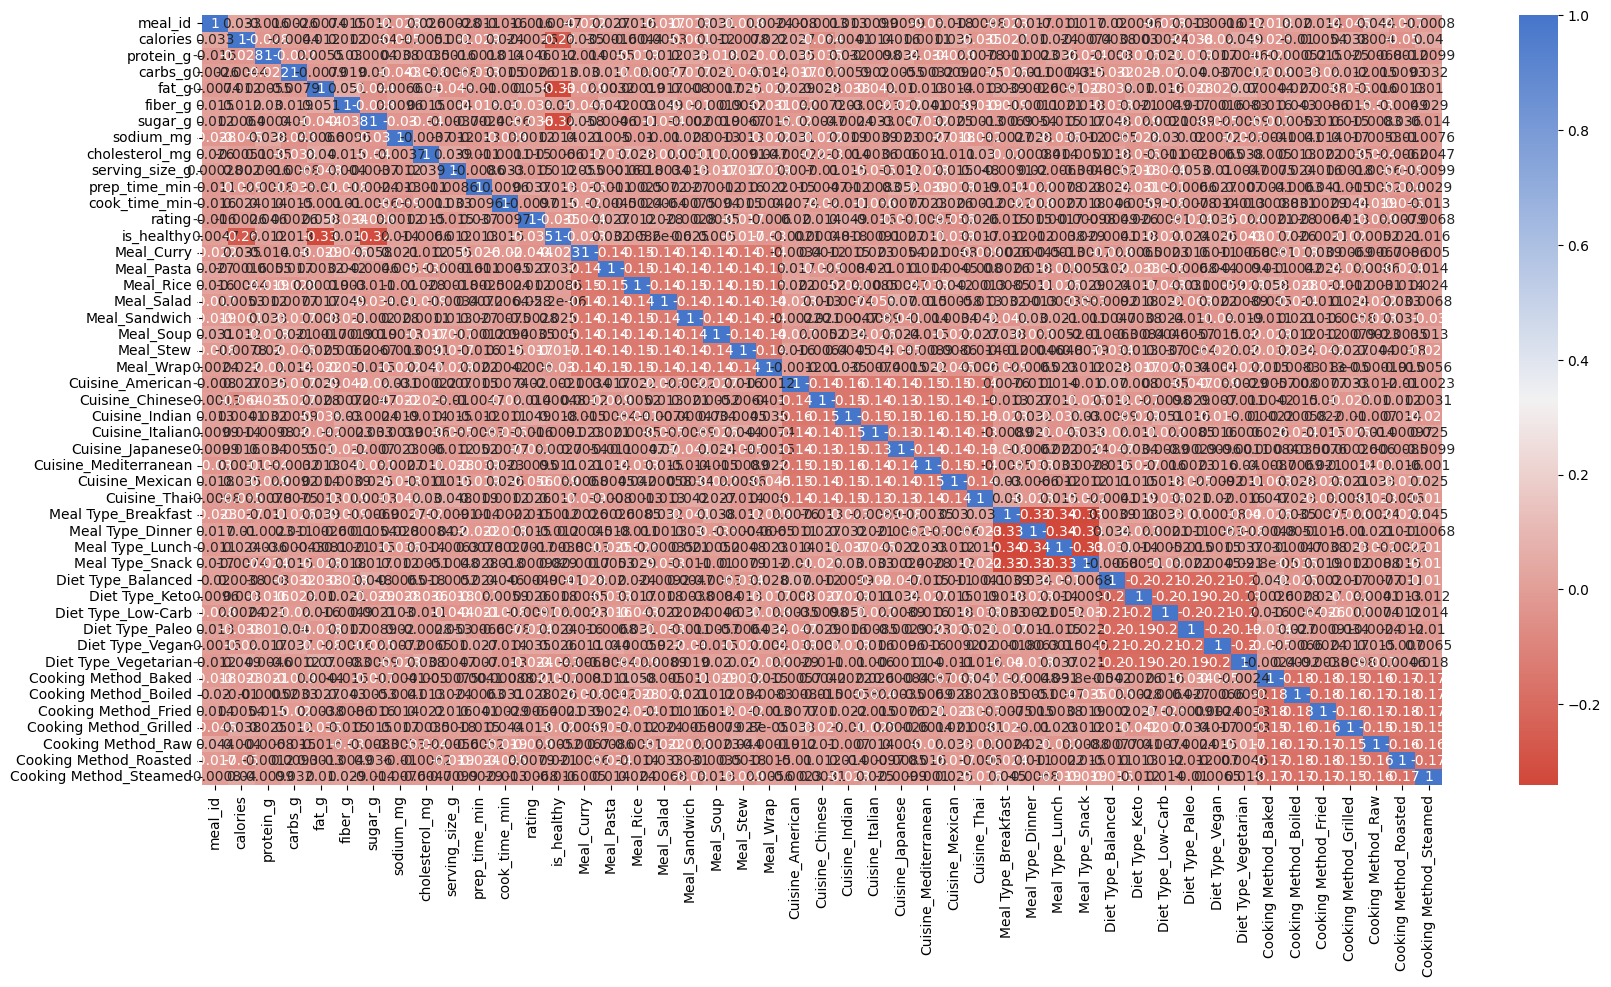

In [ ]:
added_corr = added_df.corr(numeric_only=True)
plt.figure(figsize=(20,10))
sns.heatmap(
    added_corr,
    annot = True,
    cmap = sns.diverging_palette(15, 255, as_cmap=True)
)

In [ ]:
added_corr['is_healthy'].sort_values(ascending=False)

,is_healthy
is_healthy,1.000000
Meal_Pasta,0.031706
Meal Type_Snack,0.028691
Diet Type_Vegan,0.026104
Cooking Method_Boiled,0.025710
Meal_Sandwich,0.024545
Diet Type_Paleo,0.024267
Cooking Method_Roasted,0.021395
Diet Type_Keto,0.018192
Cuisine_Indian,0.017928


***Finding***: The correlation between features and labels is extremely low, but in this test, I will not create any new feature and let the model does it job.

# Data Spliting

Before splitting the data, we might want to check all our columns and decide what to drop, what to use. Our dataset includes:
- meal_id ->
- meal_name -> drop
- cuisine
- meal_type
- diet_type
- calories
- protein_g
- carbs_g
- fat_g
- fiber_g
- sugar_g
- sodium_mg
- cholesterol_mg
- serving_size_g
- cooking_method
- prep_time_min
- cook_time_min
- rating
- is_healthy (label)
- image_url -> drop
- meal

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   meal_id         2000 non-null   int64  
 1   meal_name       2000 non-null   object 
 2   cuisine         2000 non-null   object 
 3   meal_type       2000 non-null   object 
 4   diet_type       2000 non-null   object 
 5   calories        2000 non-null   int64  
 6   protein_g       2000 non-null   float64
 7   carbs_g         2000 non-null   float64
 8   fat_g           2000 non-null   float64
 9   fiber_g         2000 non-null   float64
 10  sugar_g         2000 non-null   float64
 11  sodium_mg       2000 non-null   int64  
 12  cholesterol_mg  2000 non-null   int64  
 13  serving_size_g  2000 non-null   int64  
 14  cooking_method  2000 non-null   object 
 15  prep_time_min   2000 non-null   int64  
 16  cook_time_min   2000 non-null   int64  
 17  rating          2000 non-null   f

In [ ]:
df.drop(columns=['meal_id','meal_name', 'image_url'], inplace = True)

In [ ]:
y = df['is_healthy']
X = df.drop(columns='is_healthy')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify= y
)

## Data Preprocessing   

In [ ]:
num_cols=['calories', 'protein_g', 'carbs_g', 'fat_g', 'fiber_g', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'prep_time_min',
       'cook_time_min', 'rating']

In [ ]:
cat_col = ['cuisine', 'meal_type', 'diet_type', 'cooking_method', 'meal']

In [ ]:
preprocessing = make_column_transformer(
    (MinMaxScaler(), num_cols),
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_col),
    remainder='drop'
)
preprocessing.fit(X_train)
X_train_final = preprocessing.transform(X_train)
X_test_final = preprocessing.transform(X_test)

In [ ]:
y_train_final = np.asarray(y_train, dtype = np.float32)
y_test_final = np.asarray(y_test, dtype = np.float32)

In [ ]:
# Class balance and weights
# Used to reweights the loss so mistakes on minority class hurt more
# This might help to solve the problem we dealt in the sleep_lifestyle model
# As it easier to be incorrect with minority class
positive_rate = y_train_final.mean()
print(f"Train positive rate: {positive_rate:.3f}")
# Self-note: Nghia la cai data co balance hay khong
# Ex: positive rate = 0.094 -> nghia la 1 positive (1) cho moi 9.6 negatives (0)

classes = np.array([0,1]) #classes in labels
class_weight = dict(
    zip(classes, compute_class_weight(class_weight='balanced',
                                      classes= classes,
                                      y=y_train_final.astype(int)))
)
print("Class weights:", class_weight)
# Viec pass cai nay vao trong model.fit() se giup loss cua postive*9.6 (do 5.333/0.55=9.67)

Train positive rate: 0.094
Class weights: {np.int64(0): np.float64(0.5517241379310345), np.int64(1): np.float64(5.333333333333333)}


# Model Training

In [ ]:
tf.keras.utils.set_random_seed(42)

In [ ]:
X_train_final = X_train_final.astype('float32')
X_test_final = X_test_final.astype('float32')

model = models.Sequential([
    layers.Input(shape = (X_train_final.shape[1],)),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'binary_crossentropy',
    metrics = [
        tf.keras.metrics.Precision(name='precision'), #precision: neu predict 1 thi kha nang dung la bn
                                            # => Tot voi nhung cai nhieu am
        tf.keras.metrics.Recall(name='recall')  # recall: bao nhieu cai 1 chinh xac duoc xac dinh
                                      # => hieu qua voi nhung cai duong duoc tang weight len
    ]
)

In [ ]:
cbs = callbacks.EarlyStopping(
    monitor='val_loss',
    mode = 'min',
    patience=8,
    restore_best_weights=True,
    verbose =1)

In [ ]:
history = model.fit(
    X_train_final, y_train_final,
    validation_split = 0.2,
    epochs = 200,
    batch_size = 32,
    callbacks = cbs,
    class_weight = class_weight,
    verbose = 1
)

results = model.evaluate(X_test_final, y_test_final, verbose=0, return_dict=True)
print(f"Test loss     : {results['loss']:.4f}")
print(f"Test precision: {results['precision']:.4f}")
print(f"Test recall   : {results['recall']:.4f}")

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6338 - precision: 0.0581 - recall: 0.3506 - val_loss: 0.6373 - val_precision: 0.0536 - val_recall: 0.1071
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5936 - precision: 0.1086 - recall: 0.3420 - val_loss: 0.6165 - val_precision: 0.1129 - val_recall: 0.2500
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5546 - precision: 0.2071 - recall: 0.6200 - val_loss: 0.5977 - val_precision: 0.1667 - val_recall: 0.4643
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4978 - precision: 0.2304 - recall: 0.8319 - val_loss: 0.5789 - val_precision: 0.2095 - val_recall: 0.7857
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4431 - precision: 0.2279 - recall: 0.8022 - val_loss: 0.5724 - val_precision: 0.2182 - val_recall: 0.8571
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3614 - precision: 0.2545 - recall: 0.9016 - val_loss: 0.4983 - val_precision: 0.2525 - val_recall: 0.89

In [ ]:
y_pred = model.predict(X_test_final)
y_pred = (y_pred > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test_final, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test_final, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       363
         1.0       0.60      0.70      0.65        37

    accuracy                           0.93       400
   macro avg       0.79      0.83      0.81       400
weighted avg       0.94      0.93      0.93       400

Confusion Matrix:
[[346  17]
 [ 11  26]]
